In [1]:
#dependencies
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from config import API_key
from datetime import datetime

In [2]:
from citipy import citipy
from ratelimiter import RateLimiter

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

# read up to 750 records to obtain target of 500 in case missing records
while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
    
#create data frame of randome latitude and longitude coordinates
coordinates_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
 
# Print the number of coordinates to confirm sufficient count of cities
len(coordinates_df)

750

In [4]:
# print to confirm the data frame structure
coordinates_df.head()

,lat,lon
0,-58.737309,-121.818978
1,77.710522,-179.381489
2,-75.171739,-169.193067
3,57.125811,-64.575028
4,-83.017899,-37.271068


In [5]:
#pass coordinates through citypy module to convert to cities
city = []
country = []


for index, row in coordinates_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,rikitea,pf
1,mys shmidta,ru
2,vaini,to
3,havre-saint-pierre,ca
4,ushuaia,ar


In [6]:
# create list to hold weather data
weather_data=[]

In [7]:
#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={API_key}&units={units}&q="

#install rate limiter for API call maxing out at 50 records every minute
rate_limiter = RateLimiter(max_calls=50, period=60)

#for loop reading in API records, print log to track city data processing
for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=index
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{record_counter} -- {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue
 

Processing record #0 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Weather for mys shmidta not found.
----------------------------------------------------------------
Processing record #2 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Processing record #3 -- havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=havre-saint-pierre
----------------------------------------------------------------
Processing record #4 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Weather for mys shmidta not found.
----------------------------------------------------------------
Processing record #6 -- mar de

Processing record #48 -- port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port elizabeth
----------------------------------------------------------------
Processing record #49 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Weather for krasnoselkup not found.
----------------------------------------------------------------
Processing record #51 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #52 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #53 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred

Processing record #94 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=east london
----------------------------------------------------------------
Processing record #95 -- saint george
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint george
----------------------------------------------------------------
Processing record #96 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Weather for tabiauea not found.
----------------------------------------------------------------
Weather for vaitupu not found.
----------------------------------------------------------------
Processing record #99 -- aksarka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aksarka
----------------------------------------------------------------
Processing record #100 

Processing record #140 -- dingle
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dingle
----------------------------------------------------------------
Processing record #141 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #142 -- bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bambous virieux
----------------------------------------------------------------
Processing record #143 -- pathein
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pathein
----------------------------------------------------------------
Processing record #144 -- torbay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=torbay
----------------------------------------------------------------
Processing record #145 -- florianopoli

Processing record #185 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #186 -- springbok
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=springbok
----------------------------------------------------------------
Weather for tsihombe not found.
----------------------------------------------------------------
Processing record #188 -- talara
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=talara
----------------------------------------------------------------
Processing record #189 -- khatanga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=khatanga
----------------------------------------------------------------
Processing record #190 -- torbay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=torbay
----------------

Processing record #232 -- luderitz
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=luderitz
----------------------------------------------------------------
Processing record #233 -- rio cuarto
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rio cuarto
----------------------------------------------------------------
Processing record #234 -- kodiak
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kodiak
----------------------------------------------------------------
Processing record #235 -- west wendover
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=west wendover
----------------------------------------------------------------
Processing record #236 -- nanakuli
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nanakuli
----------------------------------------------------------------
Processing record #237 -- cast

Processing record #275 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #276 -- aqtobe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aqtobe
----------------------------------------------------------------
Processing record #277 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #278 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bluff
----------------------------------------------------------------
Processing record #279 -- mehamn
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mehamn
----------------------------------------------------------------
Processing record #280 -- tasiilaq
http://api.openweat

Processing record #320 -- marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=marsh harbour
----------------------------------------------------------------
Processing record #321 -- bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bathsheba
----------------------------------------------------------------
Processing record #322 -- caravelas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=caravelas
----------------------------------------------------------------
Processing record #323 -- araxa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=araxa
----------------------------------------------------------------
Processing record #324 -- ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ilulissat
----------------------------------------------------------------
Processing record #325 -- sain

Processing record #365 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bluff
----------------------------------------------------------------
Processing record #366 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #367 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Processing record #368 -- fortuna
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=fortuna
----------------------------------------------------------------
Processing record #369 -- ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ponta do sol
----------------------------------------------------------------
Processing record #370 -- ushuaia


Processing record #410 -- upernavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=upernavik
----------------------------------------------------------------
Processing record #411 -- maragogi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=maragogi
----------------------------------------------------------------
Processing record #412 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Weather for milingimbi not found.
----------------------------------------------------------------
Processing record #414 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Processing record #415 -- maltahohe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=maltahohe
------------

Processing record #456 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #457 -- khatanga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=khatanga
----------------------------------------------------------------
Processing record #458 -- flinders
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=flinders
----------------------------------------------------------------
Processing record #459 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #460 -- nome
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nome
----------------------------------------------------------------
Processing record #461 -- albany
http://api.

Processing record #501 -- gamba
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=gamba
----------------------------------------------------------------
Processing record #502 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Weather for lolua not found.
----------------------------------------------------------------
Processing record #504 -- pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pontes e lacerda
----------------------------------------------------------------
Processing record #505 -- dzaoudzi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dzaoudzi
----------------------------------------------------------------
Processing record #506 -- barabinsk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=barabinsk
---

Processing record #547 -- vardo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vardo
----------------------------------------------------------------
Weather for barentsburg not found.
----------------------------------------------------------------
Processing record #549 -- aksu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aksu
----------------------------------------------------------------
Weather for tunduru not found.
----------------------------------------------------------------
Processing record #551 -- ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ponta do sol
----------------------------------------------------------------
Processing record #552 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Processing record #553 -- upernavik
http://api.o

Processing record #591 -- thompson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=thompson
----------------------------------------------------------------
Processing record #592 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Processing record #593 -- kulpahar
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kulpahar
----------------------------------------------------------------
Processing record #594 -- necochea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=necochea
----------------------------------------------------------------
Processing record #595 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nikolskoye
----------------------------------------------------------------
Processing record #596 -- tuktoyaktuk
http

Weather for umzimvubu not found.
----------------------------------------------------------------
Processing record #637 -- leticia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=leticia
----------------------------------------------------------------
Weather for taolanaro not found.
----------------------------------------------------------------
Processing record #639 -- aitape
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aitape
----------------------------------------------------------------
Processing record #640 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Processing record #641 -- chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chokurdakh
----------------------------------------------------------------
Weather for korla not found.
---------

Processing record #684 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Processing record #685 -- kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kaitangata
----------------------------------------------------------------
Processing record #686 -- krapivinskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=krapivinskiy
----------------------------------------------------------------
Processing record #687 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #688 -- saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-philippe
----------------------------------------------------------------
Processing record 

Processing record #731 -- saint george
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint george
----------------------------------------------------------------
Processing record #732 -- guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=guerrero negro
----------------------------------------------------------------
Processing record #733 -- cayenne
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cayenne
----------------------------------------------------------------
Processing record #734 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #735 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #736 -- ba

In [8]:
#Convert raw weather/city data to a dataframe
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Rikitea,PF,-23.12,76.20,100,92,15.23
1,Vaini,IN,15.34,85.12,32,20,6.93
2,Havre-Saint-Pierre,CA,50.23,-0.41,54,20,20.80
3,Ushuaia,AR,-54.81,39.20,86,75,17.22
4,Mar del Plata,AR,-46.43,59.06,46,0,15.01


In [11]:
#convert weather data frame to a csv file
weather_df.to_csv("weather_data.csv")

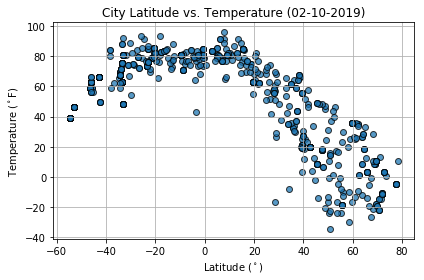

In [13]:
# First weather plot of latitude and longitude
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig1.png")
plt.show()

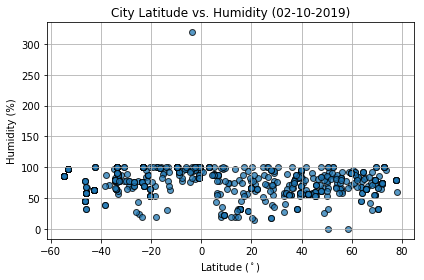

In [14]:
# Second weather plot of latitude vs. humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig2.png")
plt.show()

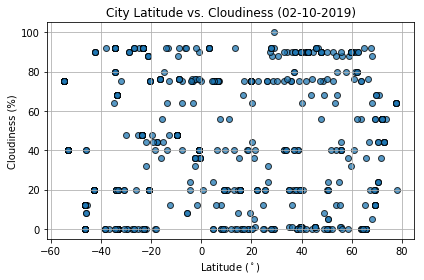

In [15]:
#City latitude vs. Cloudiness

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig3.png")
plt.show()

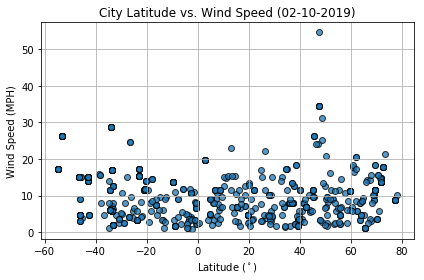

In [16]:
# City latitude vs. Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig4.png")
plt.show()